# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

fatal: destination path 'damavand' already exists and is not an empty directory.


In [2]:
!pip install -r damavand/requirements.txt

# Importings

In [3]:
from damavand.damavand.datasets.downloaders import read_addresses, PuDownloader
from damavand.damavand.datasets.digestors import PU
from damavand.damavand.signal_processing import *
from damavand.damavand.utils import *
import pandas as pd
import numpy as np
import os

# Instantiating a downloader object

In [4]:
addresses = read_addresses()
addresses['PU'].pop('real_damage')
downloader = PuDownloader(addresses['PU'])
downloader.download_extract(download_path = 'PU_compressed/', extraction_path = 'PU/', timeout = 10)

Downloading:  K001.rar
Downloading:  K002.rar
Downloading:  K003.rar
Downloading:  K004.rar
Downloading:  K005.rar
Downloading:  K006.rar
Downloading:  KA01.rar
Downloading:  KA03.rar
Downloading:  KA05.rar
Downloading:  KA06.rar
Downloading:  KA07.rar
Downloading:  KA08.rar
Downloading:  KA09.rar
Downloading:  KI01.rar
Downloading:  KI03.rar
Downloading:  KI05.rar
Downloading:  KI07.rar
Downloading:  KI08.rar
Extracting:  K001.rar
Extracting:  K002.rar
Extracting:  K003.rar
Extracting:  K004.rar
Extracting:  K005.rar
Extracting:  K006.rar
Extracting:  KA01.rar
Extracting:  KA03.rar
Extracting:  KA05.rar
Extracting:  KA06.rar
Extracting:  KA07.rar
Extracting:  KA08.rar
Extracting:  KA09.rar
Extracting:  KI01.rar
Extracting:  KI03.rar
Extracting:  KI05.rar
Extracting:  KI07.rar
Extracting:  KI08.rar


# Instantiating a digestor object

In [5]:
mining_params = {'win_len': 16000, 'hop_len': 16000}

pu = PU('PU/', os.listdir('PU/'), ['Vib'],reps = [1])
pu.mine(mining_params)

# Aggregating vibration data

In [6]:
df = pd.concat(pu.data['Vib']).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,15995,15996,15997,15998,15999,rot_speed,load_torque,radial_force,code,rep
0,-0.091553,-0.036621,-0.112915,-0.039673,-0.012207,0.796509,0.021362,-0.073242,0.000000,1.596069,...,0.131226,0.476074,-0.085449,-0.854492,-0.119019,N09,M07,F10,KI01,1
1,0.125122,-0.009155,-0.140381,0.027466,0.473022,0.045776,0.479126,-0.012207,0.003052,-0.039673,...,0.427246,0.033569,0.210571,-0.070190,-0.225830,N09,M07,F10,KI01,1
2,-0.091553,-0.030518,0.036621,-0.161743,-0.061035,-0.115967,-0.073242,0.036621,-0.021362,1.129150,...,-0.018311,-0.024414,-0.048828,-0.085449,-0.076294,N09,M07,F10,KI01,1
3,-0.012207,-0.006104,0.076294,0.137329,0.131226,0.057983,0.018311,-0.003052,-0.048828,0.033569,...,-0.158691,-0.173950,-0.103760,-0.122070,-0.088501,N09,M07,F10,KI01,1
4,-0.103760,-0.045776,-0.067139,0.054932,-0.073242,0.018311,-0.061035,-0.061035,-0.027466,0.045776,...,0.262451,-0.027466,-0.482178,-0.076294,0.274658,N09,M07,F10,KI01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,-0.314331,-0.057983,0.231934,-0.079346,0.109863,-0.039673,-0.341797,-0.088501,-0.100708,0.021362,...,-0.018311,-0.054932,-0.079346,-0.076294,-0.057983,N09,M07,F10,KA07,1
1140,-0.024414,-0.021362,-0.009155,0.057983,0.045776,0.073242,-0.003052,-0.051880,-0.131226,-0.149536,...,-0.015259,0.003052,-0.006104,0.015259,-0.061035,N09,M07,F10,KA07,1
1141,-0.149536,-0.115967,-0.036621,0.024414,0.070190,0.070190,0.030518,-0.085449,-0.115967,-0.115967,...,0.051880,0.094604,0.054932,0.054932,0.057983,N09,M07,F10,KA07,1
1142,0.125122,0.088501,0.125122,0.042725,-0.006104,-0.036621,0.030518,0.018311,0.073242,0.067139,...,0.241089,0.057983,-0.097656,0.039673,-0.115967,N09,M07,F10,KA07,1


# Signals-Metadata declaration

In [7]:
signals, metadata = df.iloc[:, : -5], df.iloc[:, -5 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,-0.091553,-0.036621,-0.112915,-0.039673,-0.012207,0.796509,0.021362,-0.073242,0.000000,1.596069,...,0.204468,-0.051880,0.048828,0.137329,-0.198364,0.131226,0.476074,-0.085449,-0.854492,-0.119019
1,0.125122,-0.009155,-0.140381,0.027466,0.473022,0.045776,0.479126,-0.012207,0.003052,-0.039673,...,0.170898,-0.372314,0.158691,0.912476,0.180054,0.427246,0.033569,0.210571,-0.070190,-0.225830
2,-0.091553,-0.030518,0.036621,-0.161743,-0.061035,-0.115967,-0.073242,0.036621,-0.021362,1.129150,...,0.073242,0.061035,0.015259,0.006104,0.003052,-0.018311,-0.024414,-0.048828,-0.085449,-0.076294
3,-0.012207,-0.006104,0.076294,0.137329,0.131226,0.057983,0.018311,-0.003052,-0.048828,0.033569,...,0.103760,0.057983,-0.097656,-0.128174,-0.119019,-0.158691,-0.173950,-0.103760,-0.122070,-0.088501
4,-0.103760,-0.045776,-0.067139,0.054932,-0.073242,0.018311,-0.061035,-0.061035,-0.027466,0.045776,...,-0.115967,-0.003052,-0.003052,-0.460815,0.045776,0.262451,-0.027466,-0.482178,-0.076294,0.274658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,-0.314331,-0.057983,0.231934,-0.079346,0.109863,-0.039673,-0.341797,-0.088501,-0.100708,0.021362,...,-0.103760,-0.067139,-0.024414,0.009155,0.009155,-0.018311,-0.054932,-0.079346,-0.076294,-0.057983
1140,-0.024414,-0.021362,-0.009155,0.057983,0.045776,0.073242,-0.003052,-0.051880,-0.131226,-0.149536,...,-0.146484,-0.067139,0.009155,-0.012207,0.009155,-0.015259,0.003052,-0.006104,0.015259,-0.061035
1141,-0.149536,-0.115967,-0.036621,0.024414,0.070190,0.070190,0.030518,-0.085449,-0.115967,-0.115967,...,-0.048828,-0.091553,-0.152588,-0.070190,-0.112915,0.051880,0.094604,0.054932,0.054932,0.057983
1142,0.125122,0.088501,0.125122,0.042725,-0.006104,-0.036621,0.030518,0.018311,0.073242,0.067139,...,-0.106812,-0.167847,-0.021362,-0.045776,0.076294,0.241089,0.057983,-0.097656,0.039673,-0.115967


In [8]:
metadata

,rot_speed,load_torque,radial_force,code,rep
0,N09,M07,F10,KI01,1
1,N09,M07,F10,KI01,1
2,N09,M07,F10,KI01,1
3,N09,M07,F10,KI01,1
4,N09,M07,F10,KI01,1
...,...,...,...,...,...
1139,N09,M07,F10,KA07,1
1140,N09,M07,F10,KA07,1
1141,N09,M07,F10,KA07,1
1142,N09,M07,F10,KA07,1


# Signal Processing

## Envelope Extraction

In [10]:
signals_env = env(signals)
signals_env.shape

(1144, 16000)

## FFT

In [11]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 31000], 'bandpass', fs = 64000, output='sos')

In [12]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(1144, 8000)

## Zoomed FFT

In [13]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 64000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(1144, 2000)

## STFT

In [14]:
STFT_window = scipy.signal.windows.hann(2000)
STFT_freq_filter = scipy.signal.butter(25, [5, 31000], 'bandpass', fs = 64000, output='sos')
signals_env_STFT = stft(signals_env, 2000, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(1144, 70, 1000)

## Statistical Features

In [15]:
feature(signals, {'mean': np.mean, 'var': np.var, 'rms': rms})

,mean,var,rms
0,-0.021931,0.173710,0.417362
1,-0.015283,0.149302,0.386698
2,-0.017115,0.185084,0.430555
3,-0.010760,0.175985,0.419644
4,-0.017881,0.156529,0.396042
...,...,...,...
1139,-0.011677,0.021566,0.147317
1140,-0.012392,0.020976,0.145362
1141,-0.013268,0.022800,0.151578
1142,-0.012900,0.022397,0.150210


# Visualization

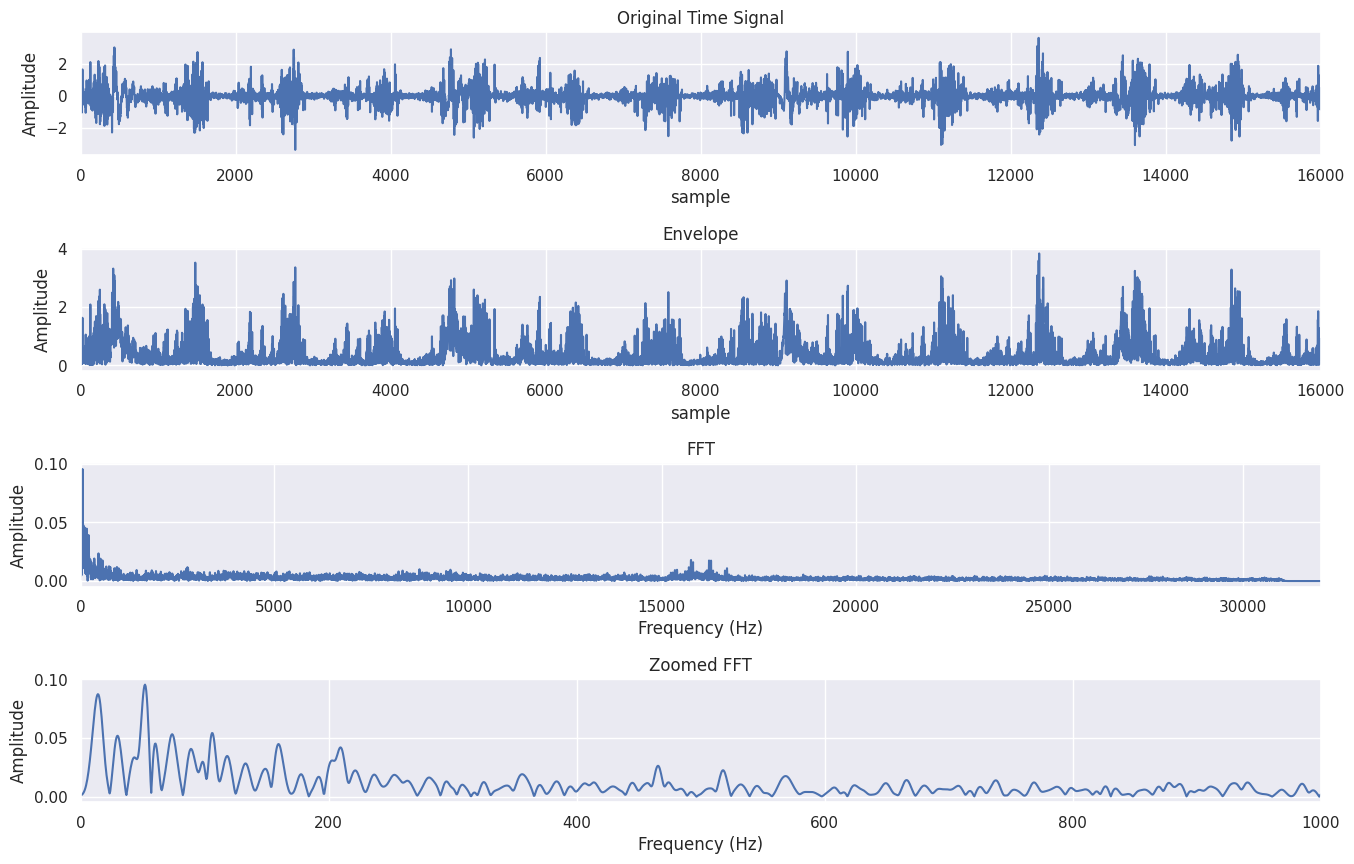

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 16000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 16000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(16000, 64000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 32000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

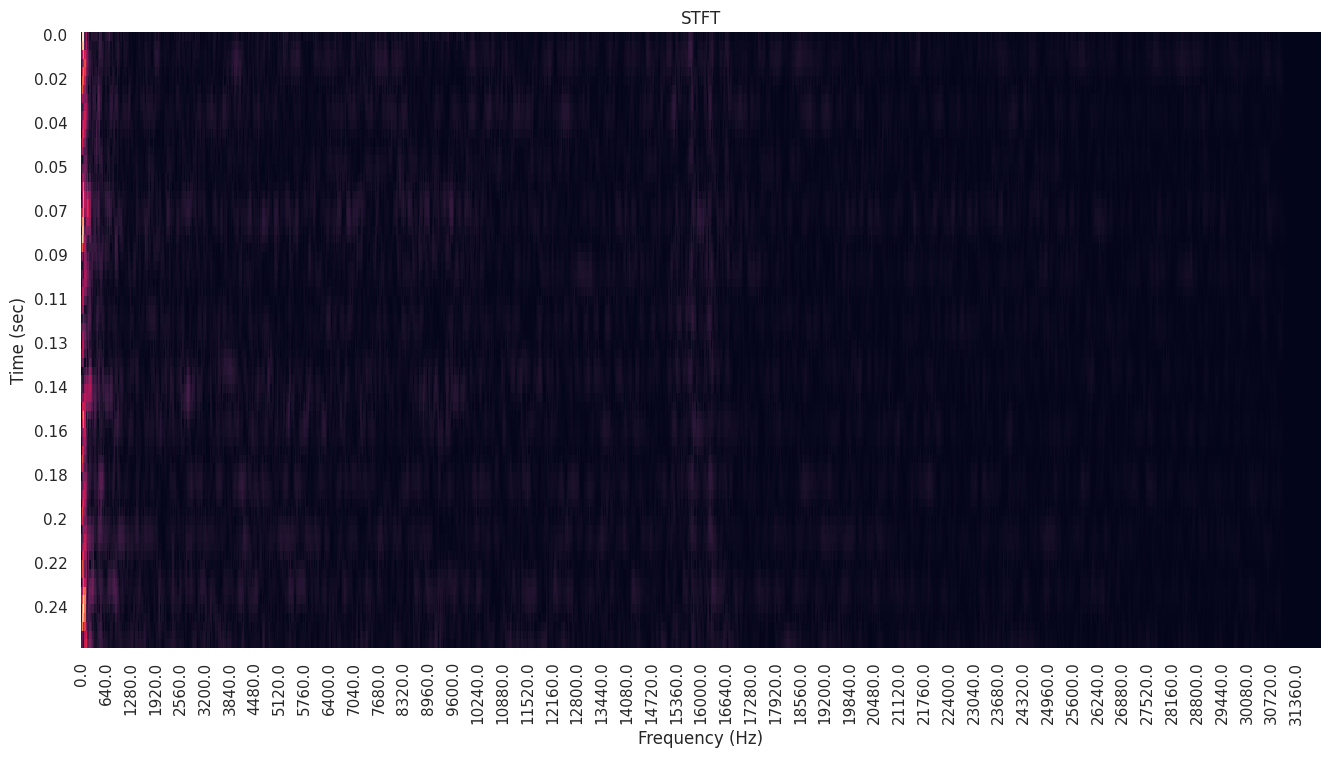

In [18]:
t = np.linspace(0, 0.25, 70)
f = fft_freq_axis(2000, 64000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()